# This notebook performs tasks for the 08/05/25 meeting
#### Shared doc: https://docs.google.com/document/d/1sHDFxsh4fMPO40zx09iNzCzoPbF_o8x5ksXAXNOoD3M/edit?usp=sharing

In [50]:
genome_ids = ['HG00851', 'HG02389', 'HG02181', 'HG01813', 'HG02383', 'HG01794', 'HG02188', 'HG02152', 'HG02391', 'HG01801', 'HG02402', 'HG02355', 'HG02190', 'HG01817', 'HG02250', 'HG02178', 'HG01816', 'HG01808', 'HG02185', 'HG02375', 'HG02394', 'HG02182', 'HG02186', 'HG00766', 'HG02392', 'HG02360', 'HG02386', 'HG02166', 'HG02401', 'HG02356', 'HG02397', 'HG01807', 'HG01797', 'HG01029', 'HG01805', 'HG02164', 'HG01815', 'HG02156', 'HG02409', 'HG02179', 'HG02353', 'HG02390', 'HG02385', 'HG02382', 'HG02154', 'HG02379', 'HG02398', 'HG02187', 'HG02155', 'HG02380', 'HG00879', 'HG02184', 'HG00867', 'HG02407', 'HG01796', 'HG00982', 'HG01802', 'HG02151', 'HG02408', 'HG00864', 'HG02373', 'HG01806', 'HG02384', 'HG01795', 'HG00956', 'HG02371', 'HG00844', 'HG01800', 'HG02153', 'HG01811', 'HG01046', 'HG02364', 'HG02180', 'HG02406', 'HG02399', 'HG02351', 'HG02165', 'HG01812', 'HG02410', 'HG00978', 'HG02395', 'HG01809', 'HG01798', 'HG02396', 'HG01031', 'HG01799', 'HG01028', 'HG00881', 'HG01804', 'HG01810', 'HG02374', 'HG02367', 'HG00759']

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from pathlib import Path

# 1. Create table with variant count per genome, per gene & the statistics for all genes/genomes 


## Load csv file

In [52]:
root_dir = join(Path.home(),"cp_als/populations")

In [53]:
infile = join(root_dir,"output/CDX/all.csv")
infile

'/Users/emilyvu/cp_als/populations/output/CDX/all.csv'

In [54]:
df = pd.read_csv(infile)

In [55]:
df = df[genome_ids + ['gene']]
df.head()

,HG00851,HG02389,HG02181,HG01813,HG02383,HG01794,HG02188,HG02152,HG02391,HG01801,...,HG01031,HG01799,HG01028,HG00881,HG01804,HG01810,HG02374,HG02367,HG00759,gene
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,TARDBP
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
4,0,1,0,1,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,1,TARDBP


## Computer variant count per gene and per genome

In [56]:
sdf=df.groupby(["gene"]).sum()

In [57]:
sdf.head()

,HG00851,HG02389,HG02181,HG01813,HG02383,HG01794,HG02188,HG02152,HG02391,HG01801,...,HG02396,HG01031,HG01799,HG01028,HG00881,HG01804,HG01810,HG02374,HG02367,HG00759
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,22,25,7,7,22,8,19,7,2,4,...,19,5,8,5,23,24,5,3,25,19
ANG,1,7,0,4,2,4,3,1,0,2,...,1,0,1,1,5,2,1,0,2,1
ATXN2,2,3,17,10,8,4,5,16,6,8,...,2,2,7,13,5,21,3,20,12,11
C19ORF12,6,11,6,9,5,5,6,19,10,5,...,9,6,5,1,5,6,14,17,12,12
C9ORF72,22,12,10,11,12,4,34,24,14,15,...,23,33,11,14,22,15,12,2,14,34


## Compute mean99

In [58]:
mean99 = pd.DataFrame(sdf.sum()/99)

In [59]:
mean99.head()

,0
HG00851,9.171717
HG02389,11.454545
HG02181,13.909091
HG01813,8.636364
HG02383,5.303030


In [60]:
m99 = mean99.transpose()

In [61]:
m99

,HG00851,HG02389,HG02181,HG01813,HG02383,HG01794,HG02188,HG02152,HG02391,HG01801,...,HG02396,HG01031,HG01799,HG01028,HG00881,HG01804,HG01810,HG02374,HG02367,HG00759
0,9.171717,11.454545,13.909091,8.636364,5.30303,6.40404,8.555556,10.40404,7.515152,8.585859,...,9.565657,7.676768,7.969697,9.666667,8.0,6.40404,10.686869,9.111111,9.575758,9.959596


## Name the row "mean99" to append to the dataframe 

In [62]:
m99.index=["mean99"]

In [63]:
m99.head()

,HG00851,HG02389,HG02181,HG01813,HG02383,HG01794,HG02188,HG02152,HG02391,HG01801,...,HG02396,HG01031,HG01799,HG01028,HG00881,HG01804,HG01810,HG02374,HG02367,HG00759
mean99,9.171717,11.454545,13.909091,8.636364,5.30303,6.40404,8.555556,10.40404,7.515152,8.585859,...,9.565657,7.676768,7.969697,9.666667,8.0,6.40404,10.686869,9.111111,9.575758,9.959596


## Compute statistics per genome, across all genes

In [64]:
genome_stats= sdf.describe()

In [65]:
genome_stats.head()

,HG00851,HG02389,HG02181,HG01813,HG02383,HG01794,HG02188,HG02152,HG02391,HG01801,...,HG02396,HG01031,HG01799,HG01028,HG00881,HG01804,HG01810,HG02374,HG02367,HG00759
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,25.222222,31.500000,38.250000,23.750000,14.583333,17.611111,23.527778,28.611111,20.666667,23.611111,...,26.305556,21.111111,21.916667,26.583333,22.000000,17.611111,29.388889,25.055556,26.333333,27.388889
std,53.411134,102.062866,135.008651,72.589009,43.785435,37.548656,58.261228,80.609208,41.021945,80.215167,...,71.087399,41.851286,76.139862,93.238672,55.127385,32.661273,75.624742,84.644785,48.404250,81.859907
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,1.000000,0.750000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.750000,2.500000,2.750000,0.750000,1.000000,2.000000,1.750000


### Adding new rows for genomes to show variant statistics

In [66]:
genome_stats_df = pd.concat([sdf,genome_stats,m99],axis=0)

In [67]:
genome_stats_df

,HG00851,HG02389,HG02181,HG01813,HG02383,HG01794,HG02188,HG02152,HG02391,HG01801,...,HG02396,HG01031,HG01799,HG01028,HG00881,HG01804,HG01810,HG02374,HG02367,HG00759
ALS2,22.000000,25.000000,7.000000,7.000000,22.000000,8.000000,19.000000,7.000000,2.000000,4.000000,...,19.000000,5.000000,8.000000,5.000000,23.000000,24.000000,5.000000,3.000000,25.000000,19.000000
ANG,1.000000,7.000000,0.000000,4.000000,2.000000,4.000000,3.000000,1.000000,0.000000,2.000000,...,1.000000,0.000000,1.000000,1.000000,5.000000,2.000000,1.000000,0.000000,2.000000,1.000000
ATXN2,2.000000,3.000000,17.000000,10.000000,8.000000,4.000000,5.000000,16.000000,6.000000,8.000000,...,2.000000,2.000000,7.000000,13.000000,5.000000,21.000000,3.000000,20.000000,12.000000,11.000000
C19ORF12,6.000000,11.000000,6.000000,9.000000,5.000000,5.000000,6.000000,19.000000,10.000000,5.000000,...,9.000000,6.000000,5.000000,1.000000,5.000000,6.000000,14.000000,17.000000,12.000000,12.000000
C9ORF72,22.000000,12.000000,10.000000,11.000000,12.000000,4.000000,34.000000,24.000000,14.000000,15.000000,...,23.000000,33.000000,11.000000,14.000000,22.000000,15.000000,12.000000,2.000000,14.000000,34.000000
CHCHD10,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000
CHMP2B,5.000000,12.000000,14.000000,13.000000,15.000000,16.000000,6.000000,9.000000,6.000000,7.000000,...,6.000000,12.000000,10.000000,7.000000,6.000000,9.000000,15.000000,7.000000,14.000000,14.000000
CHRNA3,25.000000,18.000000,37.000000,22.000000,18.000000,35.000000,6.000000,38.000000,0.000000,35.000000,...,13.000000,0.000000,18.000000,3.000000,35.000000,0.000000,33.000000,17.000000,19.000000,20.000000
CREST,87.000000,87.000000,17.000000,2.000000,2.000000,17.000000,90.000000,1.000000,89.000000,1.000000,...,89.000000,1.000000,0.000000,89.000000,86.000000,103.000000,0.000000,2.000000,89.000000,89.000000
DAO,1.000000,2.000000,0.000000,2.000000,4.000000,2.000000,3.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,2.000000,1.000000,4.000000,2.000000,4.000000,2.000000,9.000000


### Compute per gene stats

In [68]:
gene_df = sdf.transpose().describe()

In [69]:
gene_df.transpose()

,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,
ALS2,93.0,17.096774,12.592324,2.0,7.0,19.0,22.0,61.0
ANG,93.0,2.010753,2.123853,0.0,0.0,1.0,3.0,8.0
ATXN2,93.0,6.634409,4.680638,1.0,4.0,5.0,8.0,21.0
C19ORF12,93.0,8.752688,4.476159,1.0,6.0,8.0,11.0,19.0
C9ORF72,93.0,14.752688,9.342116,0.0,10.0,13.0,22.0,35.0
CHCHD10,93.0,0.559140,0.616130,0.0,0.0,0.0,1.0,2.0
CHMP2B,93.0,8.731183,4.470045,0.0,6.0,9.0,12.0,23.0
CHRNA3,93.0,16.709677,10.705119,0.0,7.0,18.0,21.0,38.0
CREST,93.0,35.247312,42.467291,0.0,1.0,3.0,87.0,104.0


In [70]:
rdf = pd.concat([sdf,gene_df.transpose()],axis=1)

In [71]:
rdf.head()

,HG00851,HG02389,HG02181,HG01813,HG02383,HG01794,HG02188,HG02152,HG02391,HG01801,...,HG02367,HG00759,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,22,25,7,7,22,8,19,7,2,4,...,25,19,93.0,17.096774,12.592324,2.0,7.0,19.0,22.0,61.0
ANG,1,7,0,4,2,4,3,1,0,2,...,2,1,93.0,2.010753,2.123853,0.0,0.0,1.0,3.0,8.0
ATXN2,2,3,17,10,8,4,5,16,6,8,...,12,11,93.0,6.634409,4.680638,1.0,4.0,5.0,8.0,21.0
C19ORF12,6,11,6,9,5,5,6,19,10,5,...,12,12,93.0,8.752688,4.476159,1.0,6.0,8.0,11.0,19.0
C9ORF72,22,12,10,11,12,4,34,24,14,15,...,14,34,93.0,14.752688,9.342116,0.0,10.0,13.0,22.0,35.0


In [72]:
rdf

,HG00851,HG02389,HG02181,HG01813,HG02383,HG01794,HG02188,HG02152,HG02391,HG01801,...,HG02367,HG00759,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,22,25,7,7,22,8,19,7,2,4,...,25,19,93.0,17.096774,12.592324,2.0,7.0,19.0,22.0,61.0
ANG,1,7,0,4,2,4,3,1,0,2,...,2,1,93.0,2.010753,2.123853,0.0,0.0,1.0,3.0,8.0
ATXN2,2,3,17,10,8,4,5,16,6,8,...,12,11,93.0,6.634409,4.680638,1.0,4.0,5.0,8.0,21.0
C19ORF12,6,11,6,9,5,5,6,19,10,5,...,12,12,93.0,8.752688,4.476159,1.0,6.0,8.0,11.0,19.0
C9ORF72,22,12,10,11,12,4,34,24,14,15,...,14,34,93.0,14.752688,9.342116,0.0,10.0,13.0,22.0,35.0
CHCHD10,1,1,1,1,0,2,0,0,0,2,...,1,2,93.0,0.559140,0.616130,0.0,0.0,0.0,1.0,2.0
CHMP2B,5,12,14,13,15,16,6,9,6,7,...,14,14,93.0,8.731183,4.470045,0.0,6.0,9.0,12.0,23.0
CHRNA3,25,18,37,22,18,35,6,38,0,35,...,19,20,93.0,16.709677,10.705119,0.0,7.0,18.0,21.0,38.0
CREST,87,87,17,2,2,17,90,1,89,1,...,89,89,93.0,35.247312,42.467291,0.0,1.0,3.0,87.0,104.0


# Plot bar chart of total variant counts per gene


In [73]:
df = pd.read_csv(infile)
df = df[['gene','POS']]


In [74]:
gdf=df.groupby(["gene"]).count()

In [75]:
gdf

,POS
gene,
ALS2,190
ANG,32
ATXN2,209
C19ORF12,56
C9ORF72,104
CHCHD10,5
CHMP2B,76
CHRNA3,99
CREST,211


In [76]:
gdf.reset_index(inplace=True)

In [77]:
gdf.rename(columns={"POS":"variant_count"},inplace=True)
gdf=gdf.sort_values(by=["variant_count"],ascending=False).reset_index(drop=True)

In [78]:
gdf

,gene,variant_count
0,ERBB4,3547
1,NEK1,639
2,FIG4,394
3,SPG11,291
4,SETX,268
5,CREST,211
6,ATXN2,209
7,VAPB,201
8,ELP3,191
9,ALS2,190


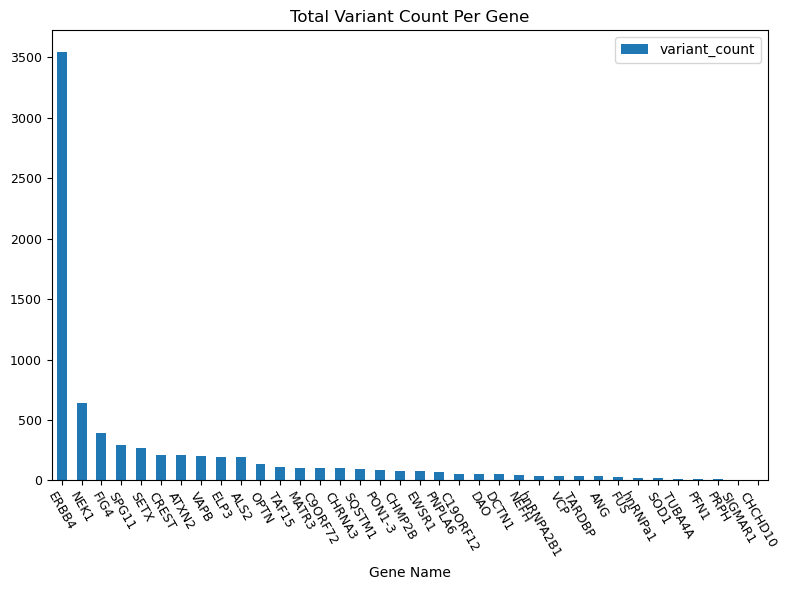

In [79]:
ax= gdf.plot(kind='bar', y="variant_count", x="gene",figsize=(8,6),fontsize=9)
ax.set_title("Total Variant Count Per Gene")
ax.set_xlabel("Gene Name")
plt.xticks(rotation=-60)
plt.tight_layout()
plt.show()

### Top 5 genes in terms of total variant counts across all genomes

In [80]:
top_genes = list(gdf['gene'][0:5])
top_genes

['ERBB4', 'NEK1', 'FIG4', 'SPG11', 'SETX']

# 2. Create Stacked Bar Chart (2x)
#### -  X axis: genome
#### -  Y axis: variant count
#### -  Take the mean for each gene across the 99 genomes to select the top 5 genes to include in the chart
#### -  Threshold of stacked bar charts: mean + SD, mean - SD

In [81]:
df = pd.read_csv(infile)
df = df[genome_ids]


## 2.1: Get the top genomes and bottom genomes in terms of total variant counts across all genes

In [82]:
hdf=pd.DataFrame()
hdf['count'] = df.sum()

In [83]:
hdf.reset_index(inplace=True)

In [84]:
hdf.head()

,index,count
0,HG00851,908
1,HG02389,1134
2,HG02181,1377
3,HG01813,855
4,HG02383,525


In [85]:
mean,std = hdf['count'].mean(),hdf['count'].std()
mean,std

(np.float64(887.8279569892474), 182.04142049305307)

## Find top and bottom genomes using mean & STD

In [86]:
top_genomes = list(hdf[hdf['count'] > mean+std]['index'])
bottom_genomes = list(hdf[hdf['count'] < mean-std]['index'])

In [87]:
len(top_genomes)

12

In [88]:
len(bottom_genomes)

17

In [89]:
df = pd.read_csv(infile)
df = df[genome_ids + ['gene']]

sdf=df.groupby(["gene"]).sum()

In [90]:
sdf.head()

,HG00851,HG02389,HG02181,HG01813,HG02383,HG01794,HG02188,HG02152,HG02391,HG01801,...,HG02396,HG01031,HG01799,HG01028,HG00881,HG01804,HG01810,HG02374,HG02367,HG00759
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,22,25,7,7,22,8,19,7,2,4,...,19,5,8,5,23,24,5,3,25,19
ANG,1,7,0,4,2,4,3,1,0,2,...,1,0,1,1,5,2,1,0,2,1
ATXN2,2,3,17,10,8,4,5,16,6,8,...,2,2,7,13,5,21,3,20,12,11
C19ORF12,6,11,6,9,5,5,6,19,10,5,...,9,6,5,1,5,6,14,17,12,12
C9ORF72,22,12,10,11,12,4,34,24,14,15,...,23,33,11,14,22,15,12,2,14,34


In [91]:
tgdf= sdf.loc[top_genes]

In [92]:
tgdf_top_genomes = tgdf[top_genomes]

In [93]:
tgdf_bot_genomes = tgdf[bottom_genomes]

In [94]:
tgdf_top_genomes.head()

,HG02389,HG02181,HG02166,HG02409,HG02382,HG02187,HG02155,HG02380,HG02371,HG01800,HG02364,HG02410
gene,,,,,,,,,,,,
ERBB4,612,801,743,640,753,716,752,704,503,466,503,629
NEK1,7,184,6,190,6,208,187,187,186,190,191,15
FIG4,54,15,31,48,46,80,47,44,42,61,42,14
SPG11,93,94,94,5,63,2,57,3,117,51,3,4
SETX,51,29,40,70,21,70,8,49,27,69,24,72


In [95]:
tgdf_bot_genomes.head()

,HG02383,HG01794,HG02355,HG02185,HG02182,HG02186,HG02356,HG02353,HG02390,HG02385,HG02184,HG00867,HG00982,HG02408,HG01812,HG02395,HG01804
gene,,,,,,,,,,,,,,,,,
ERBB4,263,84,266,235,339,238,235,311,286,194,330,105,337,354,228,257,168
NEK1,7,211,44,7,8,7,11,36,6,216,7,8,4,7,190,9,8
FIG4,8,22,53,32,6,32,41,44,58,53,41,68,35,5,40,86,41
SPG11,5,5,6,4,3,122,2,96,3,3,1,60,4,5,4,3,58
SETX,44,57,53,52,38,45,75,27,67,22,21,23,26,17,43,47,4


## Plot stacked bar chart for top genes & top genomes

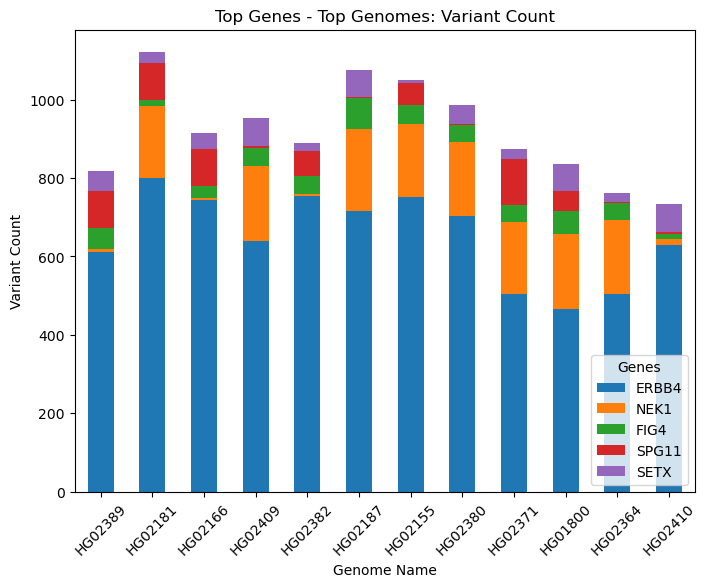

In [96]:
ax = tgdf_top_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Top Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()

## Plot stacked bar chart for top genes & bottom genomes

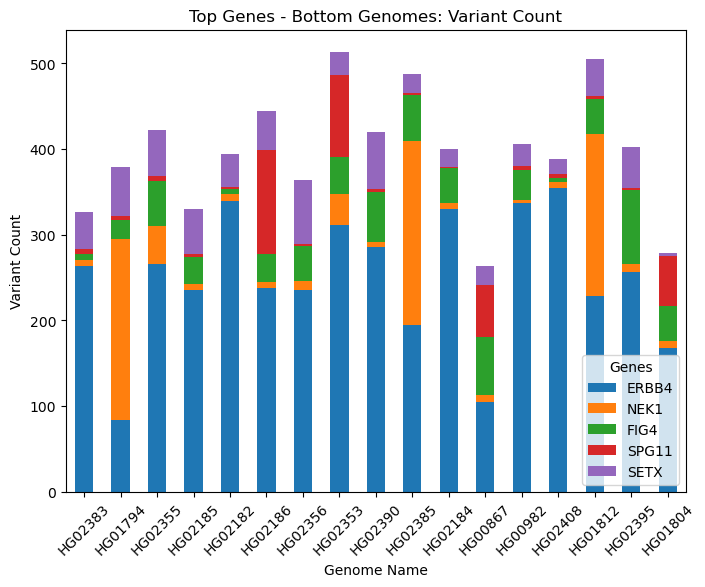

In [97]:
ax = tgdf_bot_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Bottom Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()